### Student Information
Name:王聿峰

Student ID:110030751

GitHub ID:phocion1109

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### Begin Assignment Here

# First : Take home exercise

### >>> **Copy** 
Experiment with other querying techniques

In [32]:
%load_ext autoreload
%autoreload 2
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target

X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### >>> **Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [73]:
# Answer here
X.loc[:10, 'text']

0     From: sd345@city.ac.uk (Michael Collier) Subje...
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4     From: stanly@grok11.columbiasc.ncr.com (stanly...
5     From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...
6     From: jodfishe@silver.ucs.indiana.edu (joseph ...
7     From: aldridge@netcom.com (Jacquelin Aldridge)...
8     From: geb@cs.pitt.edu (Gordon Banks) Subject: ...
9     From: libman@hsc.usc.edu (Marlena Libman) Subj...
10    From: anasaz!karl@anasazi.com (Karl Dussik) Su...
Name: text, dtype: object

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [74]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [75]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Answer here

Because item in 'C','D','F', are string type

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [76]:
X_sample = X.sample(n=1000) #random state

In [77]:
X_sample[0:4]

text  category  \
2154  From: kxgst1@pitt.edu (Kenneth Gilbert) Subjec...         2   
125   From: livesey@solntze.wpd.sgi.com (Jon Livesey...         0   
153   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
1141  From: km@cs.pitt.edu (Ken Mitchum) Subject: Re...         2   

     category_name                                           unigrams  
2154       sci.med  [From, :, kxgst1, @, pitt.edu, (, Kenneth, Gil...  
125    alt.atheism  [From, :, livesey, @, solntze.wpd.sgi.com, (, ...  
153    alt.atheism  [From, :, keith, @, cco.caltech.edu, (, Keith,...  
1141       sci.med  [From, :, km, @, cs.pitt.edu, (, Ken, Mitchum,...

In [78]:
X[0:4]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [79]:
print(len(X))
print(len(X_sample))

2257
1000


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

                        category_name  category_name
soc.religion.christian            599            268
sci.med                           594            261
comp.graphics                     584            247
alt.atheism                       480            224


<AxesSubplot: title={'center': 'Category distribution'}>

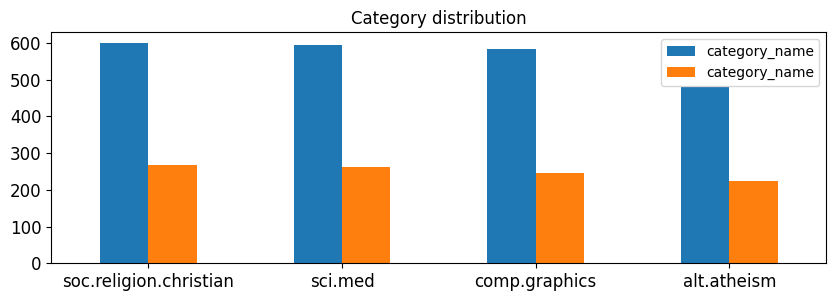

In [80]:
a=[X.category_name.value_counts()]
b=[X_sample.category_name.value_counts()]
d1=pd.DataFrame(a)
d2=pd.DataFrame(b)
d3=pd.concat([d1,d2], ignore_index=False)     #comcat 2 dataframe
d3=d3.T         #change the perform column
print(d3)
d3.plot(kind='bar',title = 'Category distribution',rot = 0, fontsize = 12, figsize = (10,3))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [81]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
# use where() to get all the positions that value 1 occurs in document 4
tmp = np.where(X_counts[4:5, 0:100].toarray() == 1)
# the second 1 represent what feature
count_vect.get_feature_names()[tmp[1][1]:tmp[1][1]+1]

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['01']

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



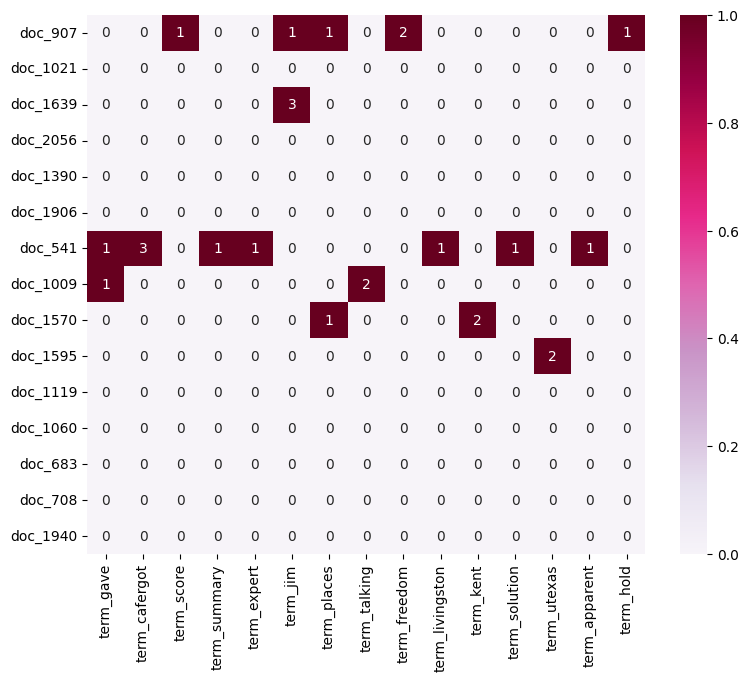

In [72]:
# Answer here
from random import sample
import seaborn as sns

# sample numbers (how many documents & how many words) -> what you can modify
num = 15

s_count_vect = CountVectorizer()
X_sample = X.sample(n=num) #random state
X_sample_counts = s_count_vect.fit_transform(X_sample.text)


# take some samples from count vectorizer
corpus = np.array(s_count_vect.get_feature_names())
corpus_length = len(corpus)
x_sample_index = sample(range(0,corpus_length), num)
x_key_list = list(corpus[x_sample_index])
plot_x_samples = ["term_"+str(i) for i in x_key_list]
plot_y_samples = ["doc_"+ str(i) for i in list(X_sample.index)]

plot_z_samples = X_sample_counts[:, x_sample_index].toarray()

df_todraw_samp = pd.DataFrame(plot_z_samples, columns = plot_x_samples, index = plot_y_samples)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw_samp,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

Here is the 2D-plot:

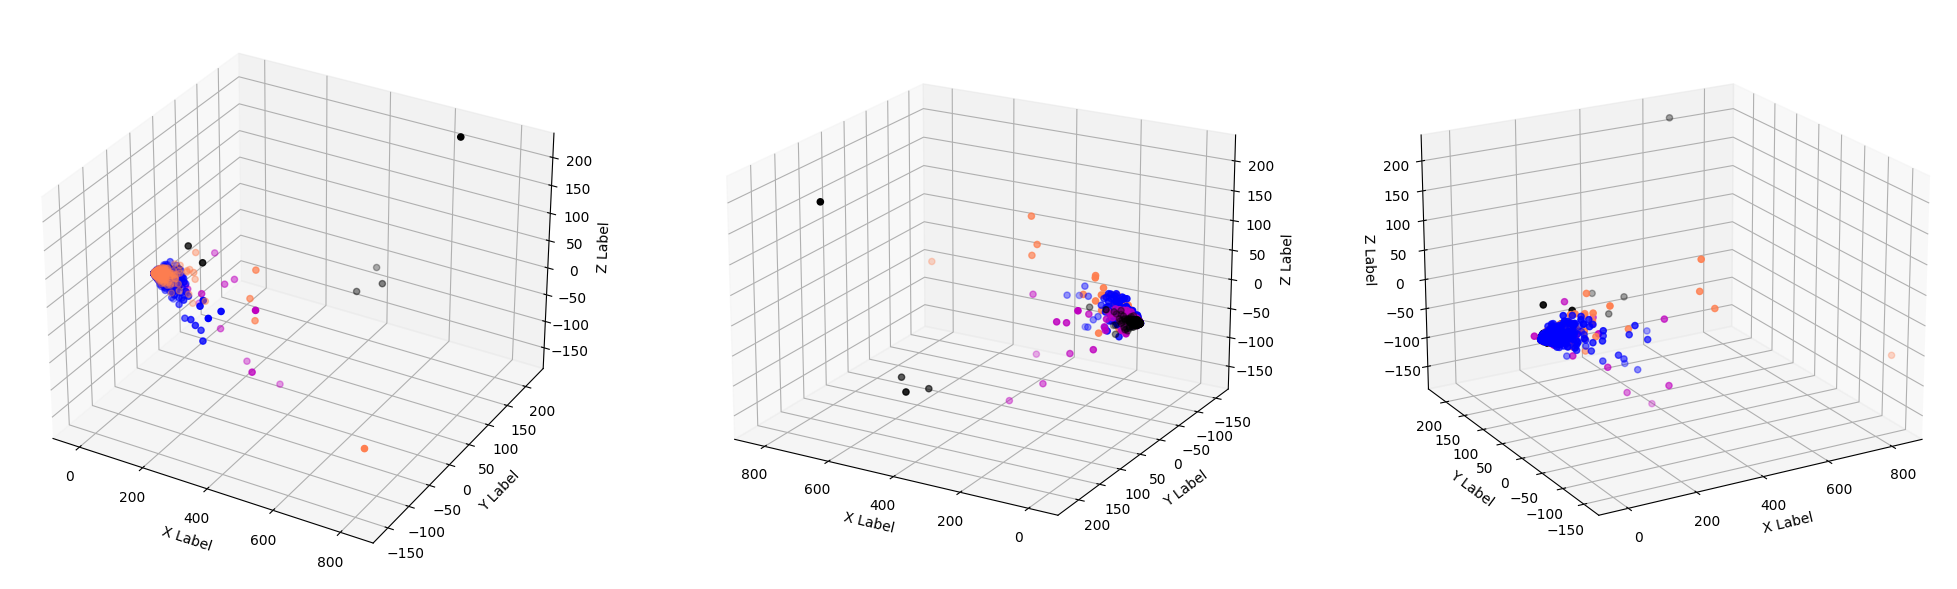

In [82]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (25,10))
# set each subplot's position
ax = fig.add_subplot(1, 3, 1, projection='3d')
ay = fig.add_subplot(1, 3, 2, projection='3d')
az = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    # show in different angle
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ay.scatter(xs, ys, zs, c = c, marker='o')
    az.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ay.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ay.set_xlabel('X Label')
ay.set_ylabel('Y Label')
ay.set_zlabel('Z Label')
az.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
az.set_xlabel('X Label')
az.set_ylabel('Y Label')
az.set_zlabel('Z Label')
# set the view angle
ay.view_init(elev=20., azim=120)
az.view_init(elev=20., azim=240)
plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [107]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Answer here
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

px_fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
px_fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



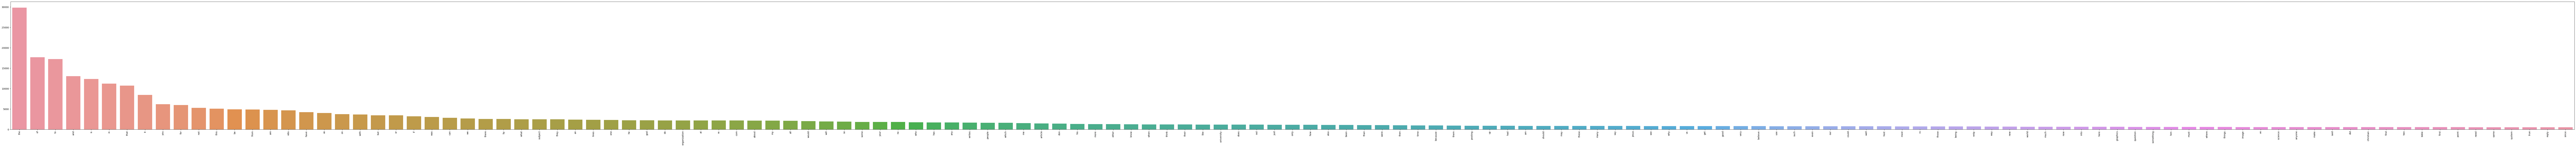

In [85]:
z = zip(term_frequencies, count_vect.get_feature_names())
res = sorted(z, key = lambda x: x[0], reverse=True)
freq, feat = zip(*res)
freq = list(freq)
feat = list(feat)
totalLen = 0
# focus on features that frequencies are > 500
for i in range(len(freq)):
    if freq[i] < 500:
        totalLen = i
        break
plt.subplots(figsize=(200, 10))
g = sns.barplot(x = feat[:totalLen],y = freq[:totalLen])
g.set_xticklabels(feat[:totalLen], rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

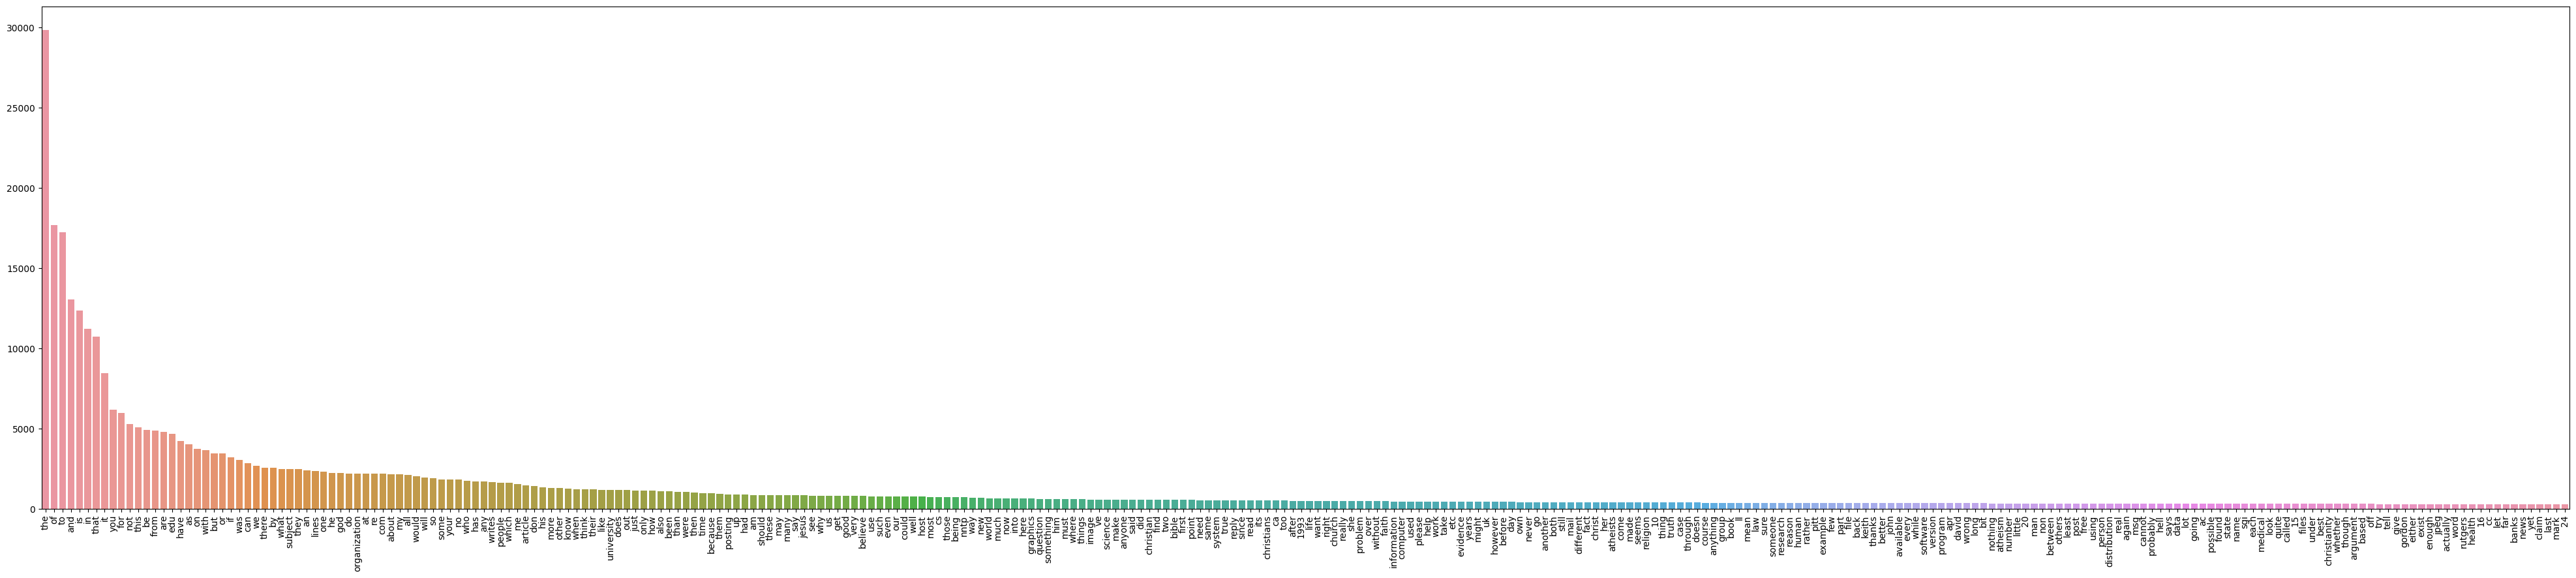

In [87]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
B=np.argsort(-term_frequencies)
A=term_frequencies[B]
plt.subplots(figsize=(50, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[B[0:300]], y=A[0:300])
g.set_xticklabels(count_vect.get_feature_names_out()[B[0:300]], rotation = 90);

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [88]:
from sklearn import preprocessing
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['cate_bin'] = mlb.transform(X['category_name']).tolist()
X[0:9]


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

       cate_bin  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

# Second : New dataset.

## read dataset

In [113]:
subdf1 = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])
subdf2 = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])
subdf3 = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])

df = [subdf1,subdf2,subdf3] #    1 for amazon, 2 for IMDB, 3 for Yelp
category_name =  ['Amazon','IMDB', 'Yelp']

for d,i,c in zip (df,range(1,4),category_name):
    d['Category'] = i
    d['Category_Name'] = c

df = pd.concat(df, ignore_index=True)
df

Review  Score  Category  \
0     So there is no way for me to plug it in here i...      0         1   
1                           Good case, Excellent value.      1         1   
2                                Great for the jawbone.      1         1   
3     Tied to charger for conversations lasting more...      0         1   
4                                     The mic is great.      1         1   
...                                                 ...    ...       ...   
2743  I think food should have flavor and texture an...      0         3   
2744                           Appetite instantly gone.      0         3   
2745  Overall I was not impressed and would not go b...      0         3   
2746  The whole experience was underwhelming, and I ...      0         3   
2747  Then, as if I hadn't wasted enough of my life ...      0         3   

     Category_Name  
0           Amazon  
1           Amazon  
2           Amazon  
3           Amazon  
4           Amazon  
...            ...  
2743          Yelp  
2744          Yelp  
2745          Yelp  
2746          Yelp  
2747          Yelp  

[2748 rows x 4 columns]

## miss value

In [114]:
import helpers.data_mining_helpers as dmh
print('length of df : ',len(df))
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))

dummy_rec = [{'Review': 'dummy record','Score': 0,'Category': 2}]
df = df.append(dummy_rec, ignore_index = True)
print('length after add',len(df))
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))
df.dropna(inplace = True)
print('length after drop none',len(df))
print(df.isnull().apply(lambda x: dmh.check_missing_values(x)))


length of df :  2748
                               Review                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             Category                       Category_Name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0  
length after add 2749
                               Review                               Score  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             Category                       Category_Name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   1  
length after drop none 2748
         

C:\Users\PW\AppData\Local\Temp\ipykernel_11356\956243009.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



## Duplicate Data

In [115]:
print(df.duplicated())
print('Duplicate number:', sum(df.duplicated()))
print('Duplicate number of Review : ', sum(df.duplicated(subset=['Review'])))
print('Duplicate number of score : ', sum(df.duplicated(subset=['Score'])))
print('Original length of df', len(df))
df.drop_duplicates(keep="first", inplace=True)
print('after remove duplicate length of df',len(df))

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool
Duplicate number: 17
Duplicate number of Review :  17
Duplicate number of score :  2746
Original length of df 2748
after remove duplicate length of df 2731


## Data Preprocessing



Score count of X:
 1    1376
0    1355
Name: Score, dtype: int64


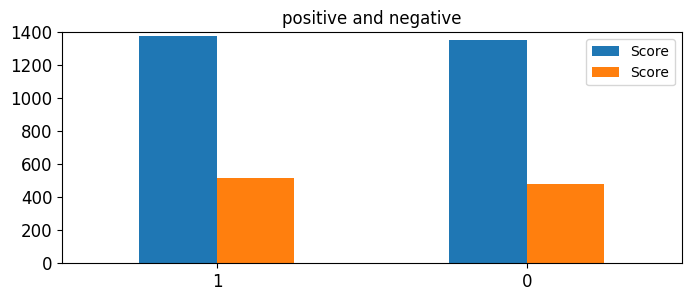

In [116]:
df_sample = df.sample(n=1000) 

import matplotlib.pyplot as plt
%matplotlib inline

print('\n\nScore count of X:\n', df.Score.value_counts())
result_combined_df = pd.concat([df.Score.value_counts(),
                                df_sample.Score.value_counts()], axis=1) \
                        .plot(kind = 'bar', title = 'positive and negative', \
                                ylim = [0, 1400], rot = 0, \
                                fontsize = 12, figsize = (8,3))

## Feature

In [117]:
import nltk
# obtain unigrams for each text
df['unigrams'] = df['Review'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

Unigrams of Hello World! ['hello', 'world']
Unigrams of first sentence: ['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']
(2731, 5155)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



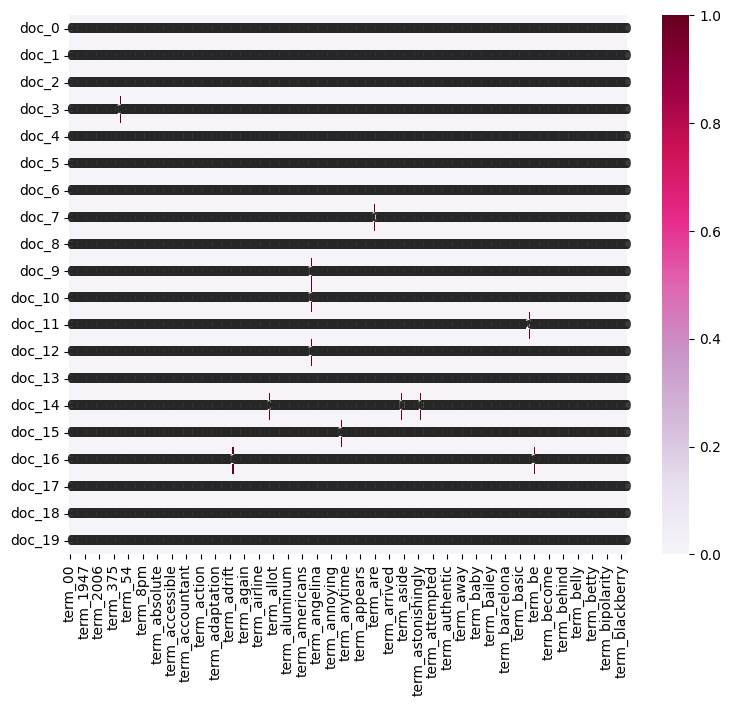

In [118]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.Review)
analyze = count_vect.build_analyzer()
print('Unigrams of Hello World!', analyze("Hello World!"))
print('Unigrams of first sentence:', analyze(" ".join(list(df[:1].Review))))
print(df_counts.shape)
print(count_vect.get_feature_names()[0:10])
print(df_counts[0:5, 0:100].toarray())

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:500]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]
plot_z = df_counts[0:20, 0:500].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

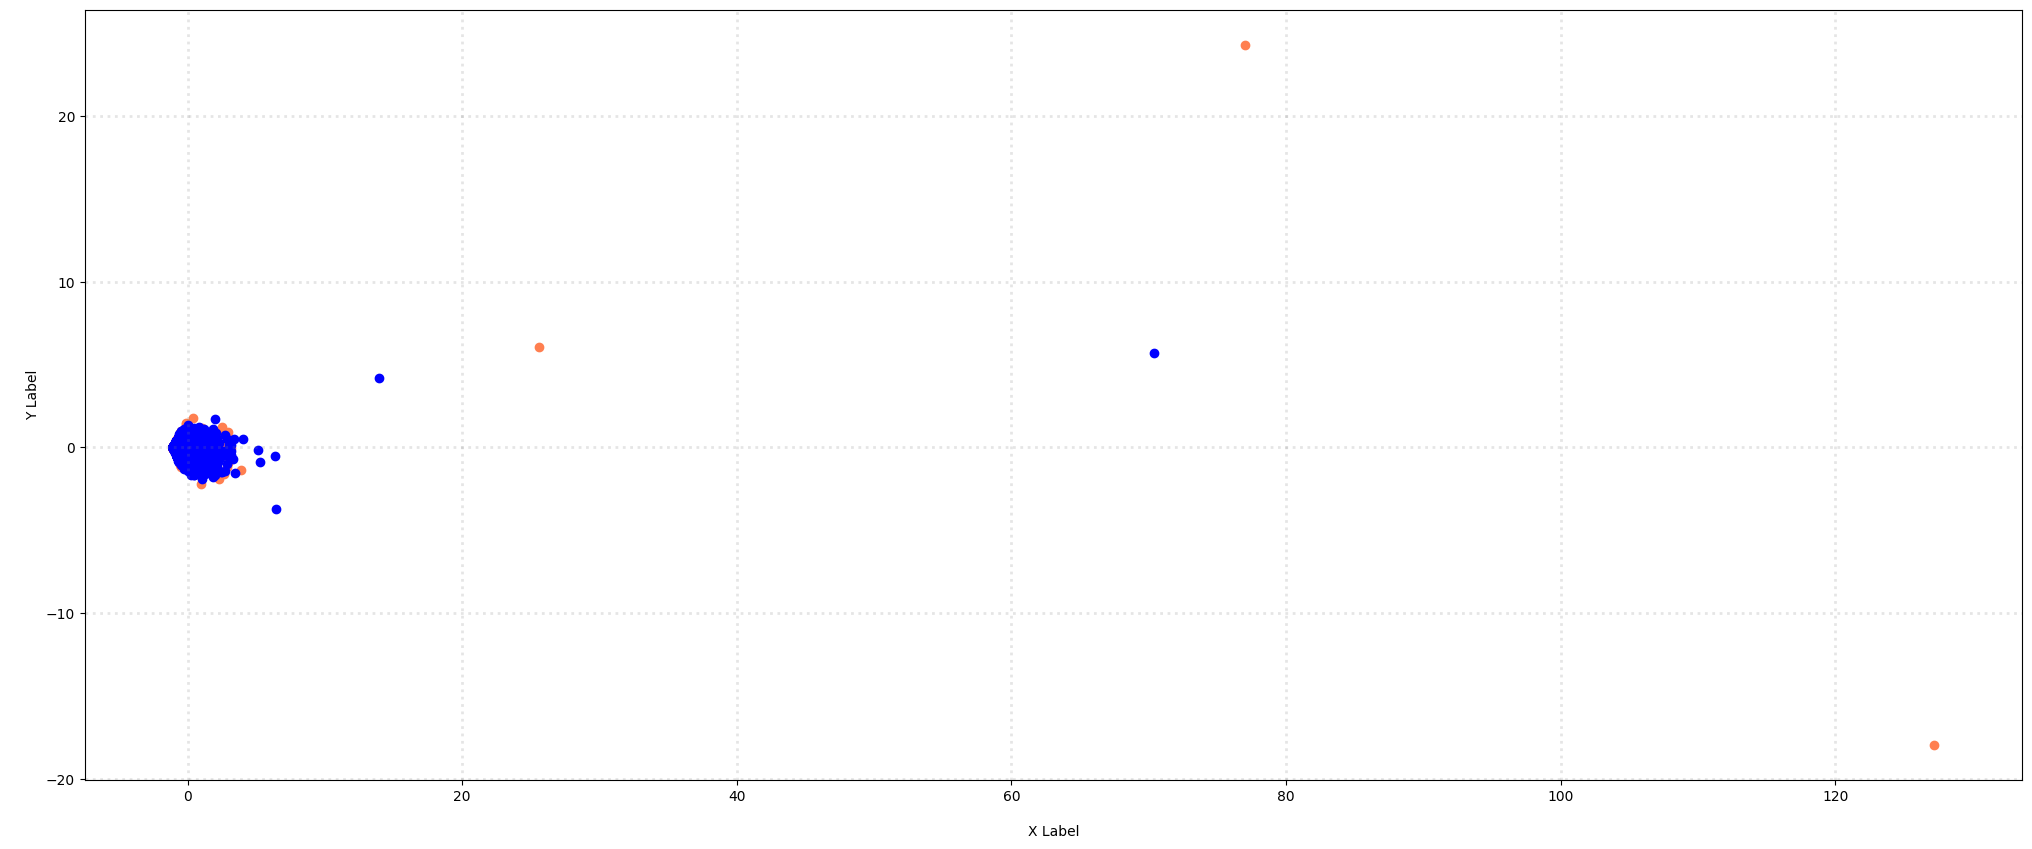

In [119]:
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
col = ['coral', 'blue']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, [0,1]):
    xs = df_reduced[df['Score'] == s].T[0]
    ys = df_reduced[df['Score'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

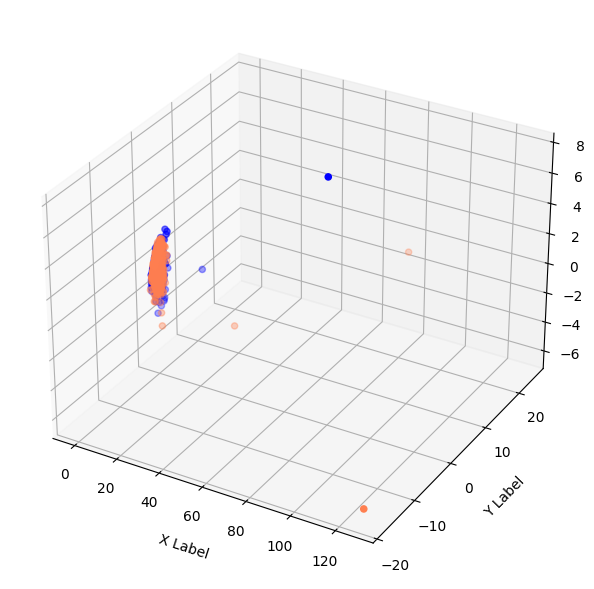

In [120]:
from mpl_toolkits.mplot3d import Axes3D
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1, 3, 1, projection='3d')

for c, s in zip(col, [0, 1]):
    xs = df_reduced[df['Score'] == s].T[0]
    ys = df_reduced[df['Score'] == s].T[1]
    zs = df_reduced[df['Score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



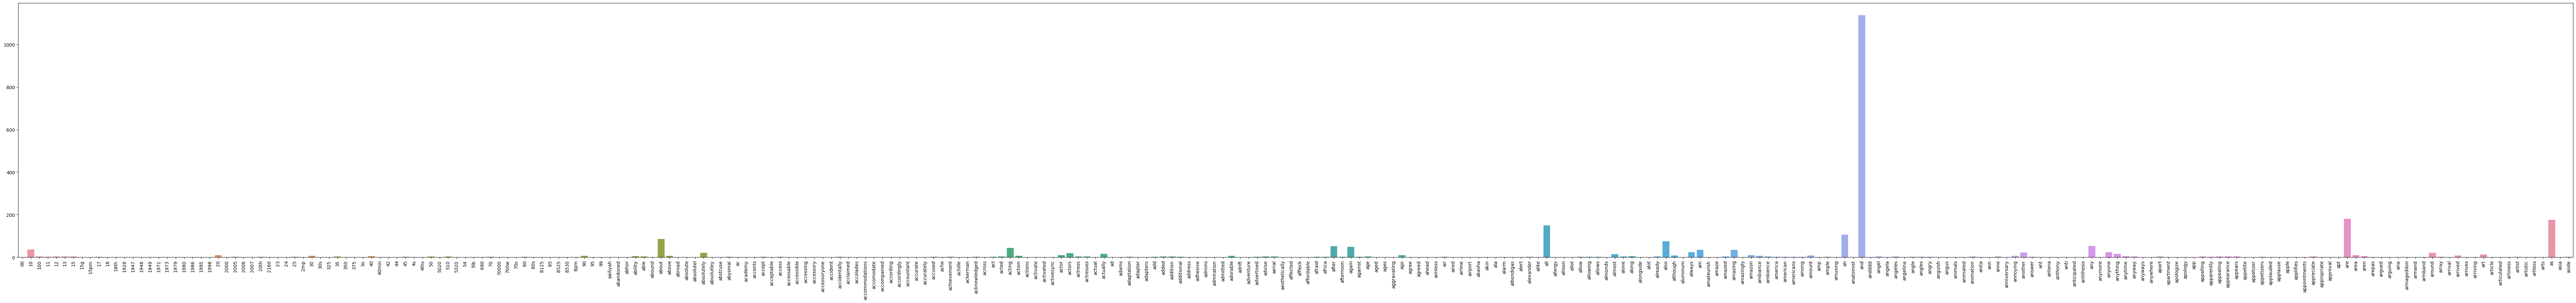

In [121]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [122]:
# We can use plotly to have a nicer interactive visualizarion
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
fig.show()

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



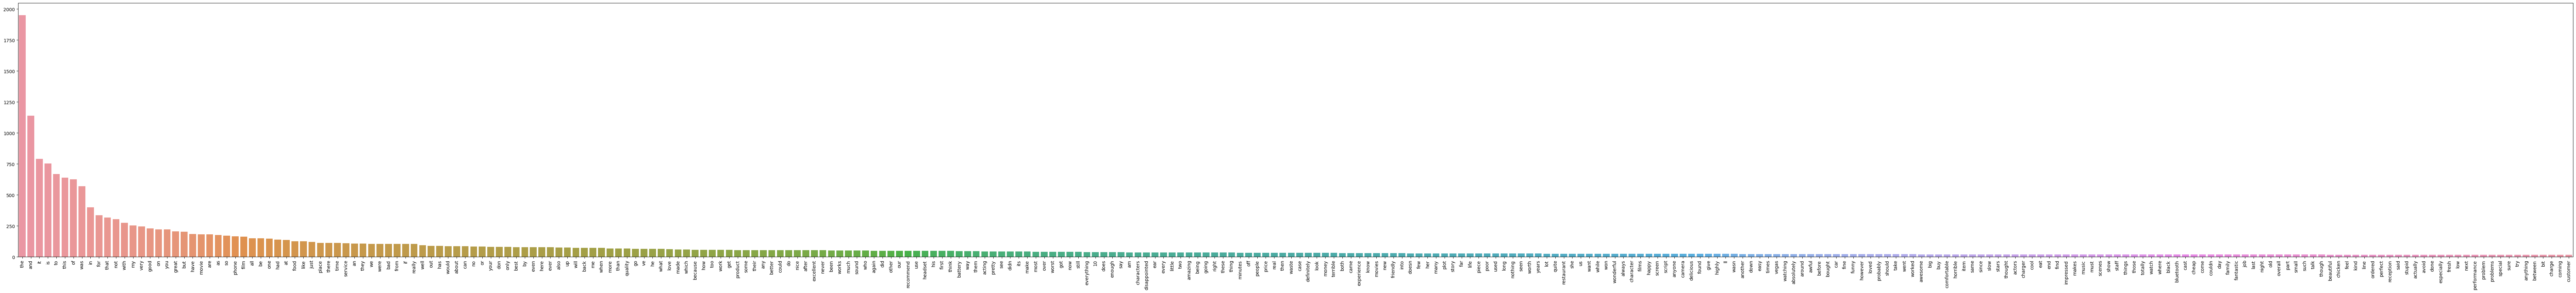

In [123]:
z = zip(term_frequencies, count_vect.get_feature_names())
# then sorted
res = sorted(z, key = lambda x: x[0], reverse=True)
freq, feat = zip(*res)
plt.subplots(figsize=(100, 10))
# turn both of them back to list
freq = list(freq)
feat = list(feat)
# plot
g = sns.barplot(x = feat[:300],y = freq[:300])
g.set_xticklabels(feat[:300], rotation = 90);

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



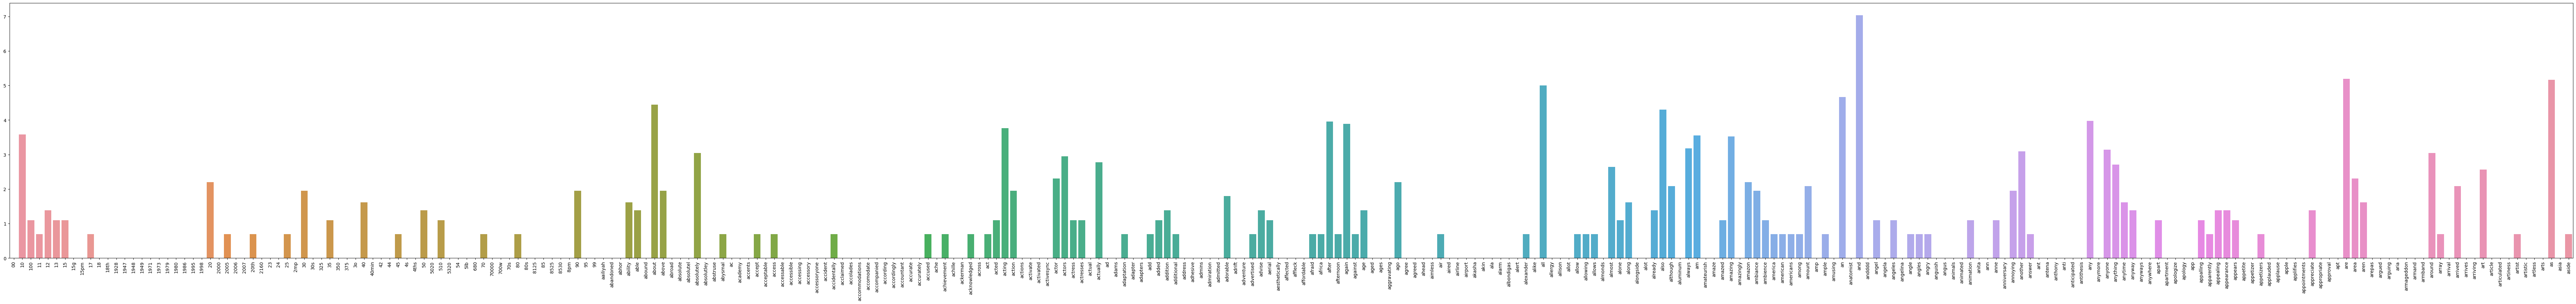

In [124]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [125]:
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['Review']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['Review']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['Review']
document_to_transform_3.append(random_record_3)
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third : TF-IDF features

In [128]:
tmp_feature = list(count_vect.get_feature_names())
tmp_cnt = []
# set counting list to initial 0
for i in range(len(tmp_feature)):
    tmp_cnt.append(0)
# use three stage for loop to go through all unigrams in all sentence
for i in range(len(df)):
    if list(df[i:i+1]["Score"])[0] == 1:
        for j in list(df[i:i+1]["unigrams"])[0]:
            for k in range(len(tmp_feature)):
                if j == tmp_feature[k]:
                    tmp_cnt[k] += 1
                    break
    else:
        for j in list(df[i:i+1]["unigrams"])[0]:
            for k in range(len(tmp_feature)):
                if j == tmp_feature[k]:
                    tmp_cnt[k] -= 1
                    break
# show first 100 features
print(tmp_feature[0:100])                    
print(tmp_cnt[0:100])

C:\Users\PW\envs\data_mining\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations']
[0, -1, 1, -1, -2, -1, 1, 0, 0, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -2, 1, 2, 1, 1, 0, -1, 1, 1, 0, 0, -5, -1, 1, -3, 1, -1, -1, -

and 199
great 118
good 93
very 43
is 39
with 38
love 32
nice 32
well 31
works 30


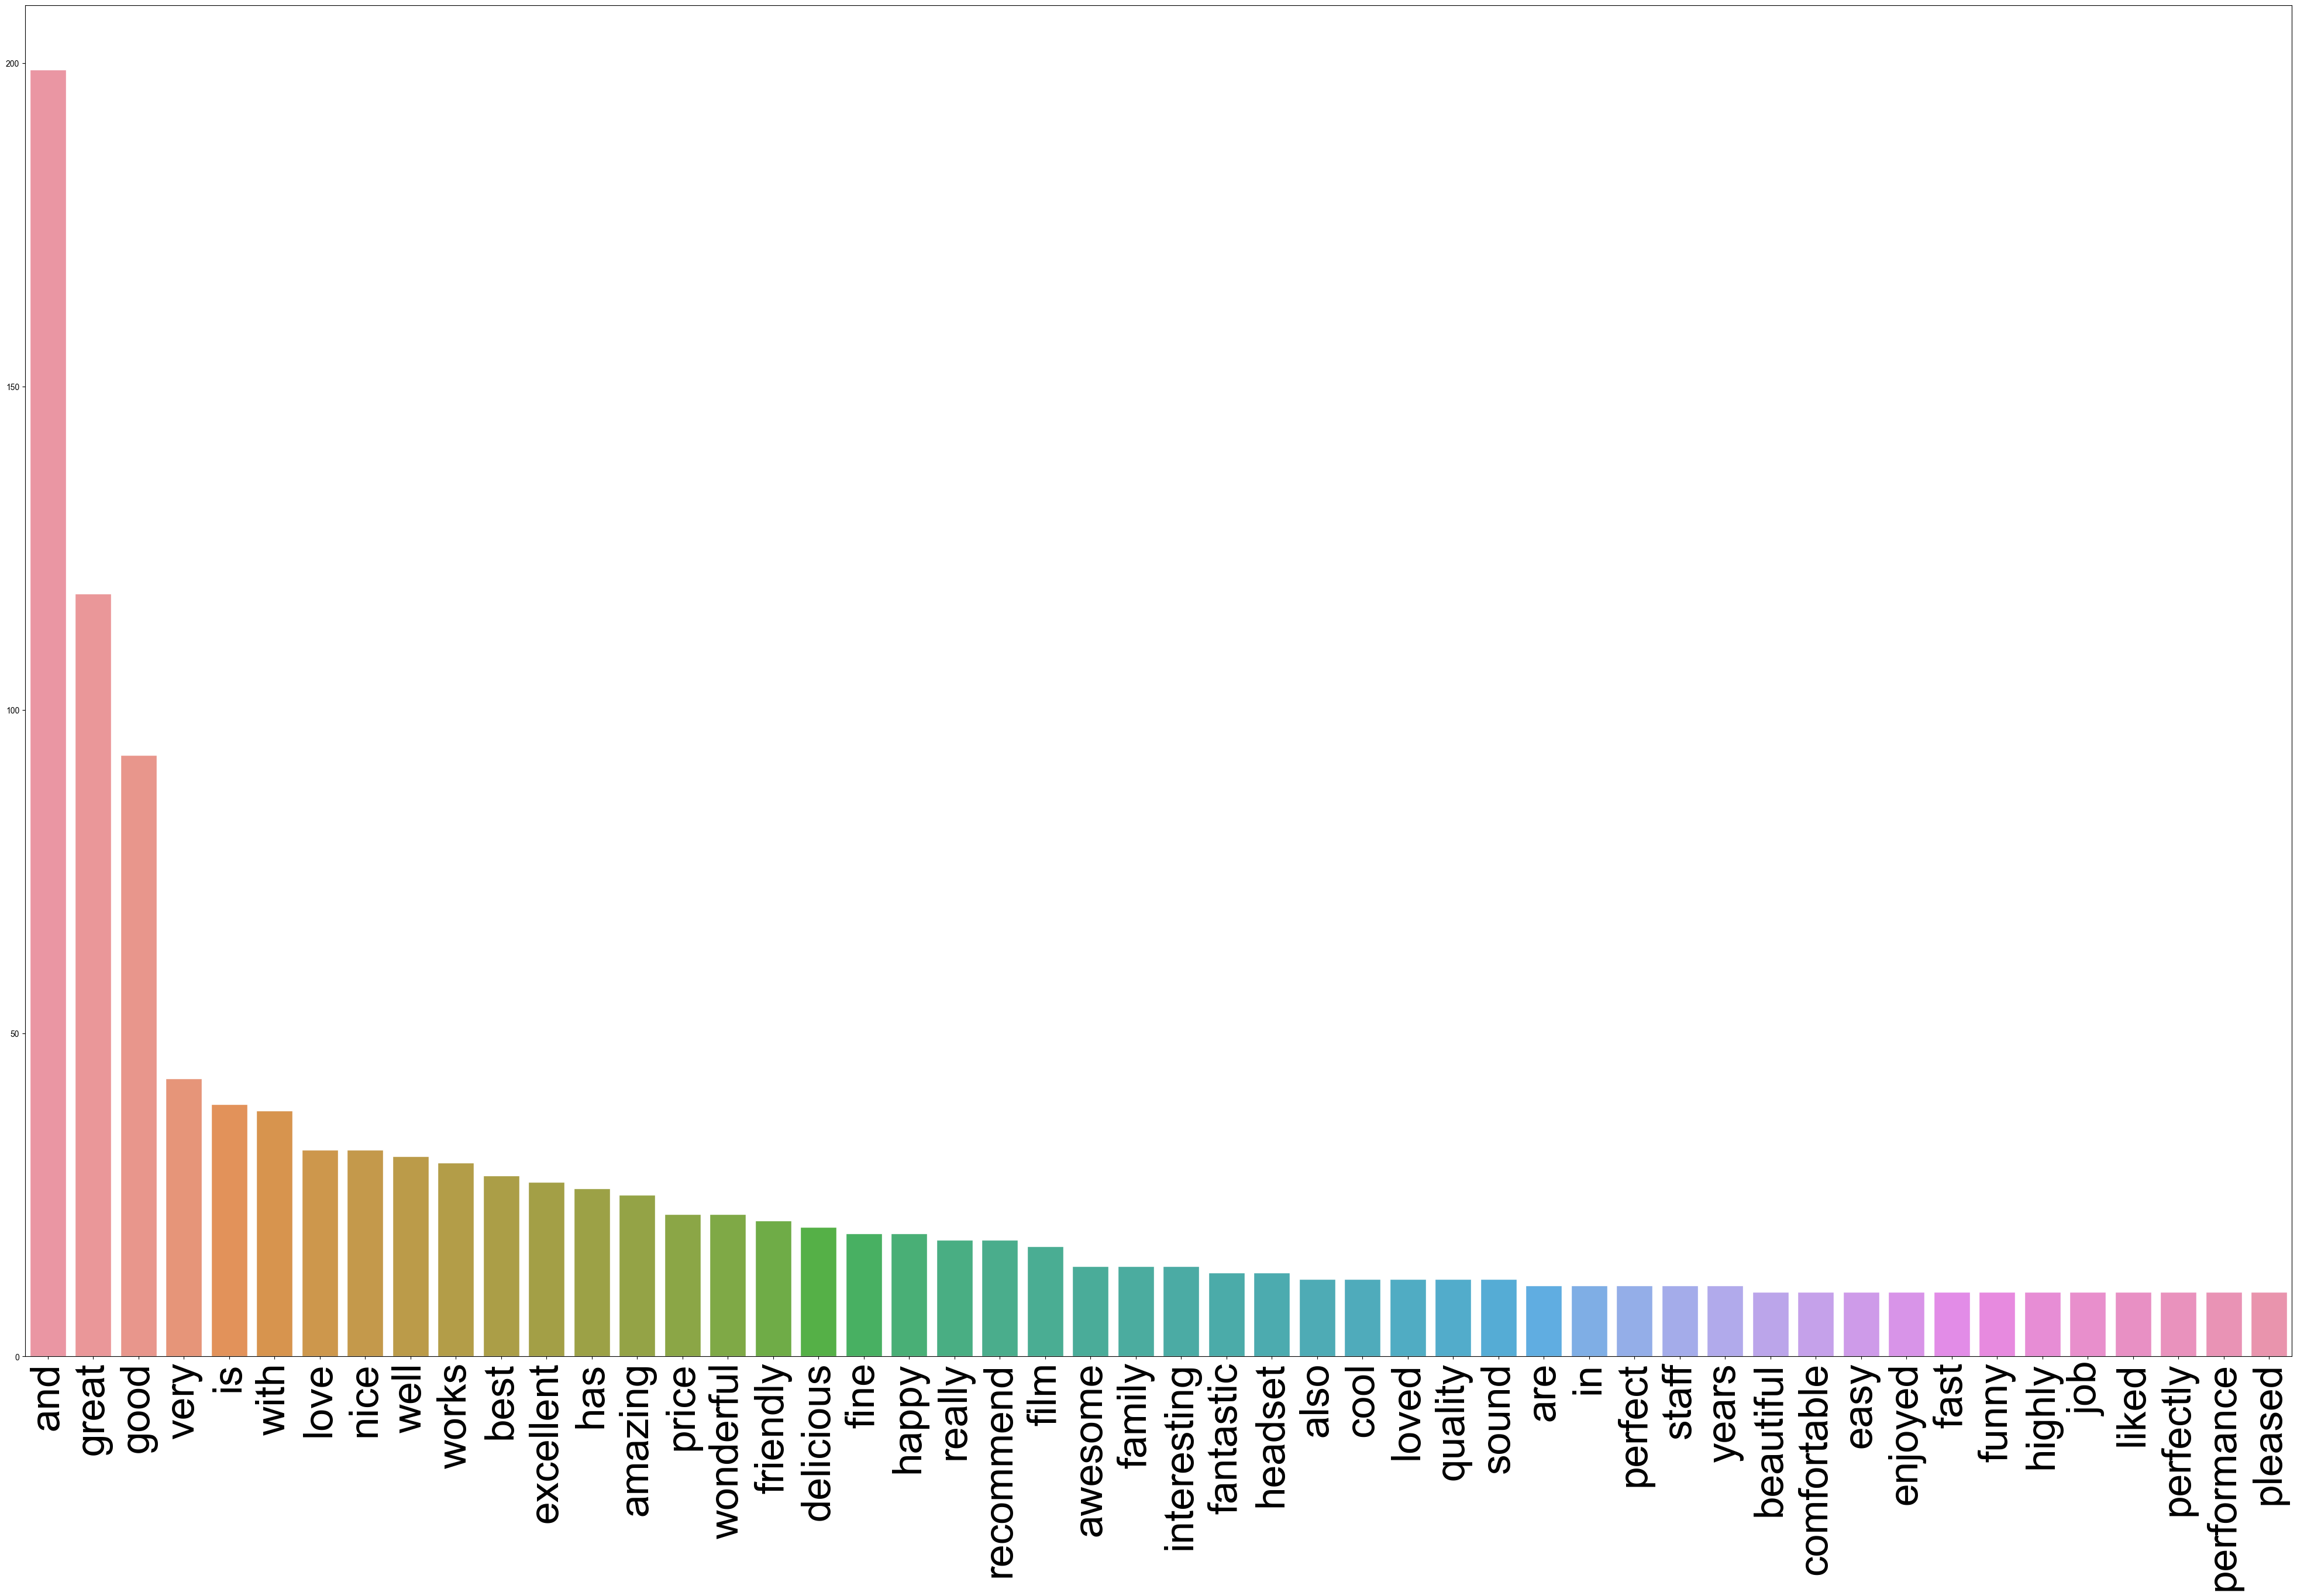

In [129]:
z = zip(tmp_feature, tmp_cnt)
res = sorted(z, key = lambda x: x[1], reverse=True)
tmp_feature, tmp_cnt = zip(*res)
plt.subplots(figsize=(50, 30))
tmp_feature = list(tmp_feature)
tmp_cnt = list(tmp_cnt)
sns.set(font_scale = 10)
g = sns.barplot(x = tmp_feature[:50],y = tmp_cnt[:50])
g.set_xticklabels(tmp_feature[:50], rotation = 90, fontsize = 50);
# top 10 features based on score
for x, y in zip(tmp_feature[0:10], tmp_cnt[0:10]):
    print(x, y)

not -164
to -89
was -89
bad -76
it -63
that -50
of -47
be -38
did -36
no -35


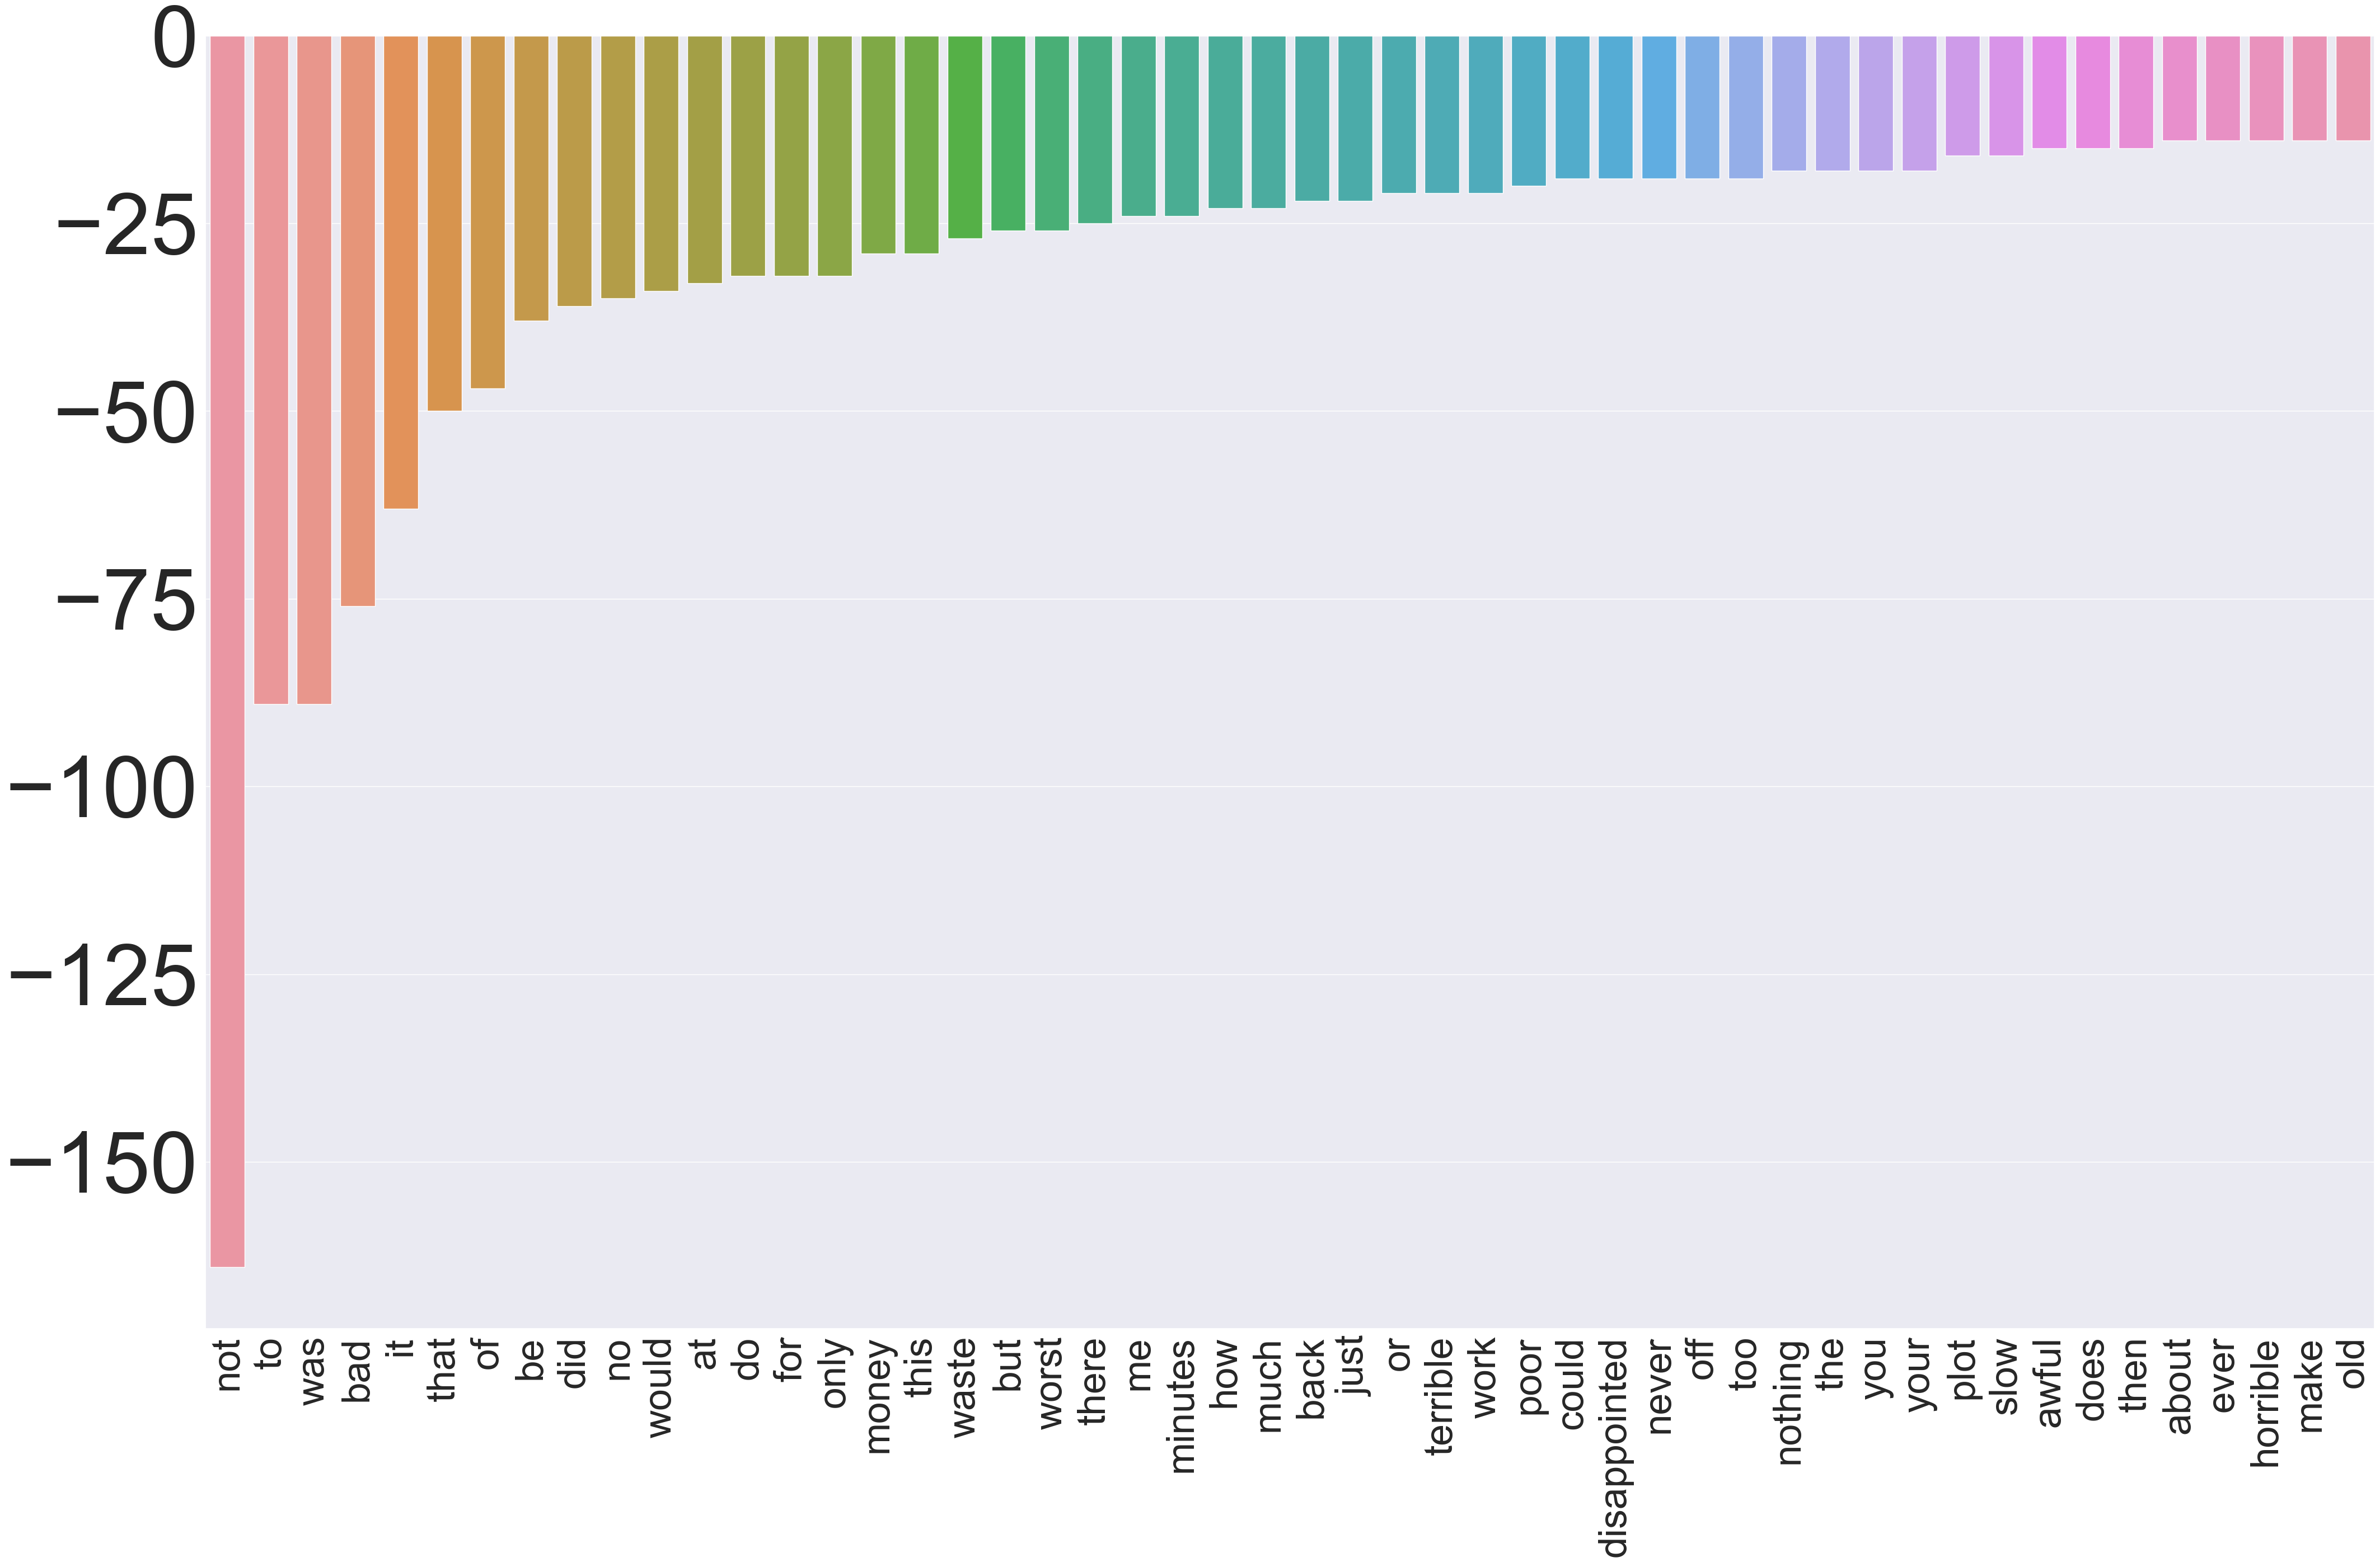

In [130]:
z = zip(tmp_feature, tmp_cnt)
res = sorted(z, key = lambda x: x[1], reverse=False)
tmp_feature, tmp_cnt = zip(*res)
plt.subplots(figsize=(50, 30))
tmp_feature = list(tmp_feature)
tmp_cnt = list(tmp_cnt)
sns.set(font_scale = 10)
g = sns.barplot(x = tmp_feature[:50],y = tmp_cnt[:50])
g.set_xticklabels(tmp_feature[:50], rotation = 90, fontsize = 50);
# top 10 features based on score
for x, y in zip(tmp_feature[0:10], tmp_cnt[0:10]):
    print(x, y)

In [132]:
# tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tdIdf = vectorizer.fit_transform(df.Review)

tfidfList = []
for j in range(0,tdIdf.shape[1]):
    tfidfList.append(sum(tdIdf[:,j].toarray()))
print(tfidfList[:10])

[array([0.33908404]), array([10.75292685]), array([1.20423151]), array([0.70285171]), array([1.26504987]), array([0.8735092]), array([1.16576263]), array([0.2958318]), array([0.03341855]), array([0.64038214])]


In [133]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

# use TF-IDF feature
X_train, X_test, Y_train, Y_test = train_test_split(tdIdf, df.Score, test_size=0.25)

# 
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8257686676427526

In [134]:
examples = ['this is good picture.',   #Should be 1
            'food is so bad.',     #Should be 0
            'that was a terrible experience',  #Should be 0
            'so glad to see you again', #Should be 1
            'i feel so sad',  #Should be 0
           ]

doc_term_matrix = vectorizer.transform(examples)
bnb.predict(doc_term_matrix)

array([1, 0, 0, 1, 0], dtype=int64)

In [135]:
# use word frequency feature
X_train, X_test, Y_train, Y_test = train_test_split(df_counts, df.Score, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.828696925329429

In [136]:
bnb.predict(doc_term_matrix)

array([1, 0, 0, 1, 0], dtype=int64)